# **Sequential on House_Prices Dataset**

# Libraries and Packages Required

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Loading Datasets

* datasets consist 3 different CSV format files

* train, test, and one with predicted prices

In [71]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
predicted =pd.read_csv('sample_submission.csv')

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Basic EDA

In [74]:
# separating the catergorical and numerical features for treatment of null values
categorical_features = []
numerical_features = []
for i in train.columns:
  if train[i].dtype==object:
    categorical_features.append(i)
  else:
    numerical_features.append(i)

test_categorical_features = []
test_numerical_features = []
for i in test.columns:
  if test[i].dtype==object:
    test_categorical_features.append(i)
  else:
    test_numerical_features.append(i)

In [75]:
test_categorical_features, categorical_features

(['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  

In [76]:
train.loc[:,categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [77]:
test.loc[:,test_categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1455 non-null   object
 1   Street         1459 non-null   object
 2   Alley          107 non-null    object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities      1457 non-null   object
 6   LotConfig      1459 non-null   object
 7   LandSlope      1459 non-null   object
 8   Neighborhood   1459 non-null   object
 9   Condition1     1459 non-null   object
 10  Condition2     1459 non-null   object
 11  BldgType       1459 non-null   object
 12  HouseStyle     1459 non-null   object
 13  RoofStyle      1459 non-null   object
 14  RoofMatl       1459 non-null   object
 15  Exterior1st    1458 non-null   object
 16  Exterior2nd    1458 non-null   object
 17  MasVnrType     565 non-null    object
 18  ExterQual      1459 non-null

**Removing Features**

In [78]:
# removing the listed below columns from categorical_features as percentile of null values are more than actual ones
drop_list = ['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']
print(f"Dropping Features List : {drop_list}")

print(f"length of categorical_feature : {len(categorical_features)}")
print(f"length of test_categorical_feature : {len(test_categorical_features)}")

for i in drop_list:
  categorical_features.remove(i)
  test_categorical_features.remove(i)
print("features removed successfully")
print(f"length of categorical_feature : {len(categorical_features)}")
print(f"length of test_categorical_feature : {len(test_categorical_features)}")

Dropping Features List : ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
length of categorical_feature : 43
length of test_categorical_feature : 43
features removed successfully
length of categorical_feature : 37
length of test_categorical_feature : 37


**Replacing Null values in some Features**

In [79]:
treating_feature = train.loc[:,categorical_features].columns[train.loc[:,categorical_features].isna().any()].tolist()
treating_feature_test = test.loc[:,test_categorical_features].columns[test.loc[:,test_categorical_features].isna().any()].tolist()

for i in treating_feature:
    train[i]= train[i].fillna(train[i].mode()[0])

for i in treating_feature_test:
      test[i] = test[i].fillna(test[i].mode()[0])

In [80]:
test.loc[:,test_categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null

In [81]:
train.loc[:,categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

**Replacing null values in numerical_features**

In [82]:
treating_numerical_feature = train.loc[:,numerical_features].columns[train.loc[:,numerical_features].isna().any()].tolist()
treating_numerical_feature_test = test.loc[:,test_numerical_features].columns[test.loc[:,test_numerical_features].isna().any()].tolist()

for i in treating_numerical_feature:
  train[i] = train[i].fillna(train[i].mean())

for i in treating_numerical_feature_test:
  test[i] = test[i].fillna(test[i].mean())

In [83]:
train.loc[:,numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [84]:
test.loc[:,test_numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

**Correlation between Numerical_features**

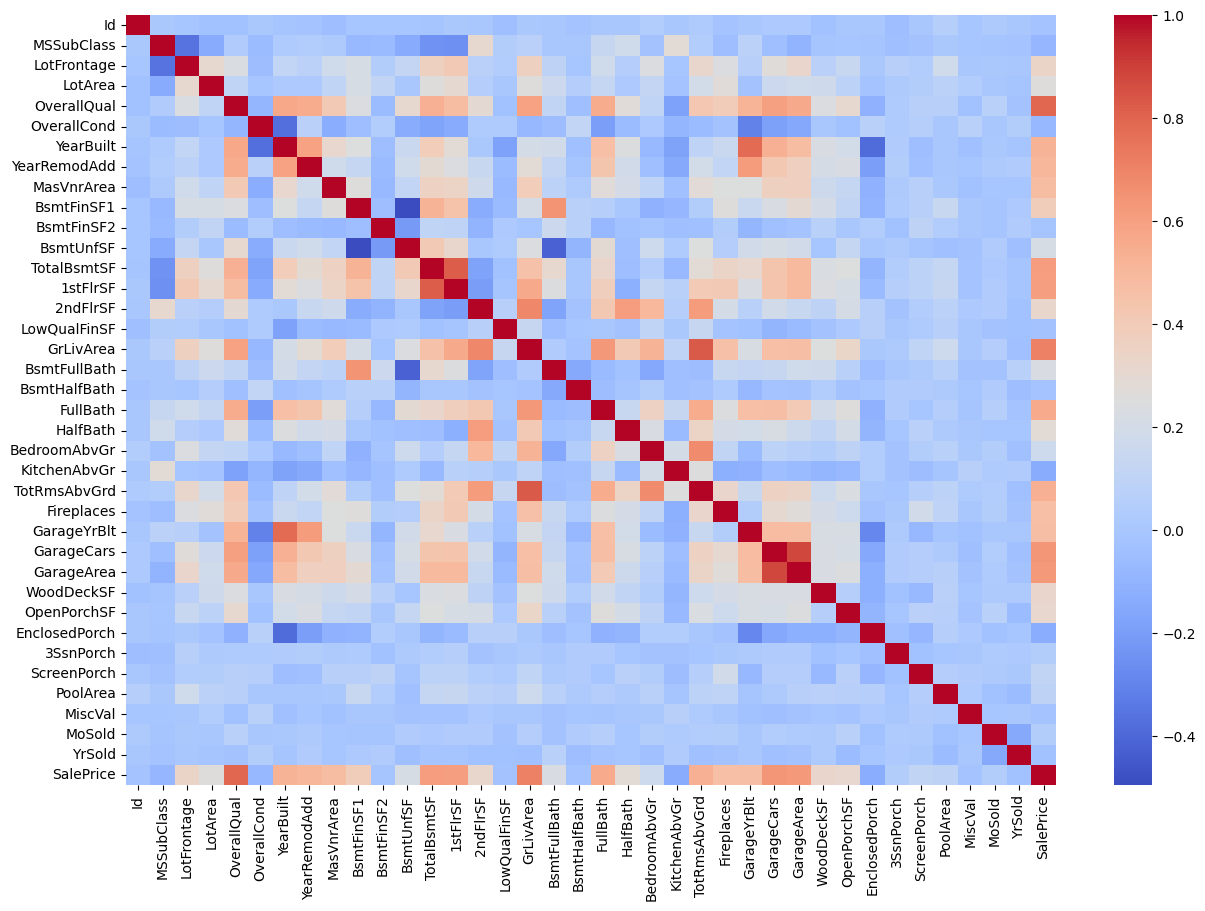

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(train.loc[:,numerical_features].corr(),cmap='coolwarm')
plt.show()

**Converting Catergorical features to numerical for model ready**

In [86]:
# for training set
for i in categorical_features:
  train[i] = le.fit_transform(train[i])
le.classes_

# for testing set
for i in test_categorical_features:
  test[i] = le.fit_transform(test[i])
le.classes_

array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)

 **Correlation b/w categorical features**

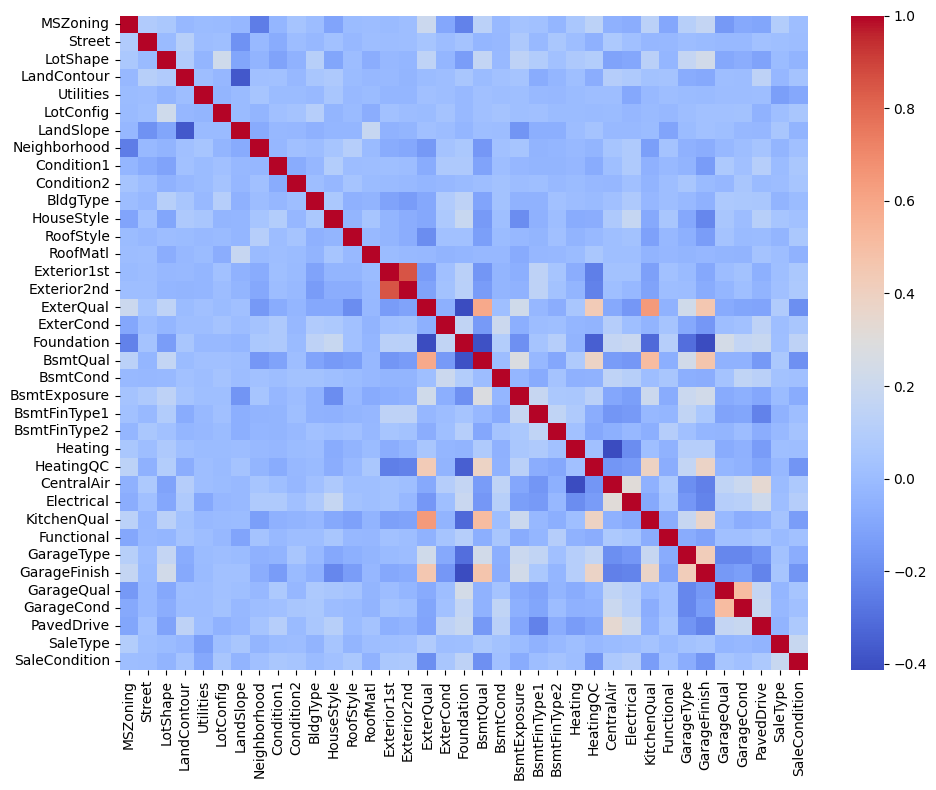

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(train.loc[:,categorical_features].corr(),cmap='coolwarm')
plt.tight_layout()
plt.show()

**using new Instances for training and testing set**

In [88]:
train_df = train.loc[:,categorical_features+numerical_features]
train_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


In [89]:
test_df = test.loc[:,test_categorical_features+test_numerical_features]
test_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,2,1,3,3,0,4,0,12,1,2,...,730.0,140,0,0,0,120,0,0,6,2010
1,3,1,0,3,0,0,0,12,2,2,...,312.0,393,36,0,0,0,0,12500,6,2010
2,3,1,0,3,0,4,0,8,2,2,...,482.0,212,34,0,0,0,0,0,3,2010
3,3,1,0,3,0,4,0,8,2,2,...,470.0,360,36,0,0,0,0,0,6,2010
4,3,1,0,1,0,4,0,22,2,2,...,506.0,0,82,0,0,144,0,0,1,2010


# Splitting features and target

In [90]:
X = train_df.iloc[:,:-1]
Y = train_df['SalePrice']

In [91]:
X.shape, Y.shape

((1460, 74), (1460,))

# RFE

In [93]:
rf = RandomForestRegressor()
rfe = RFE(rf,n_features_to_select=20)
rfe.fit(X,Y)
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False])

In [94]:
selected_features = [feature for feature,selected in zip(X.columns,rfe.support_) if selected]
selected_features

['Neighborhood',
 'Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF']

In [95]:
x_train = X.loc[:,selected_features]
y_train = Y

x_train.shape, y_train.shape

((1460, 20), (1460,))

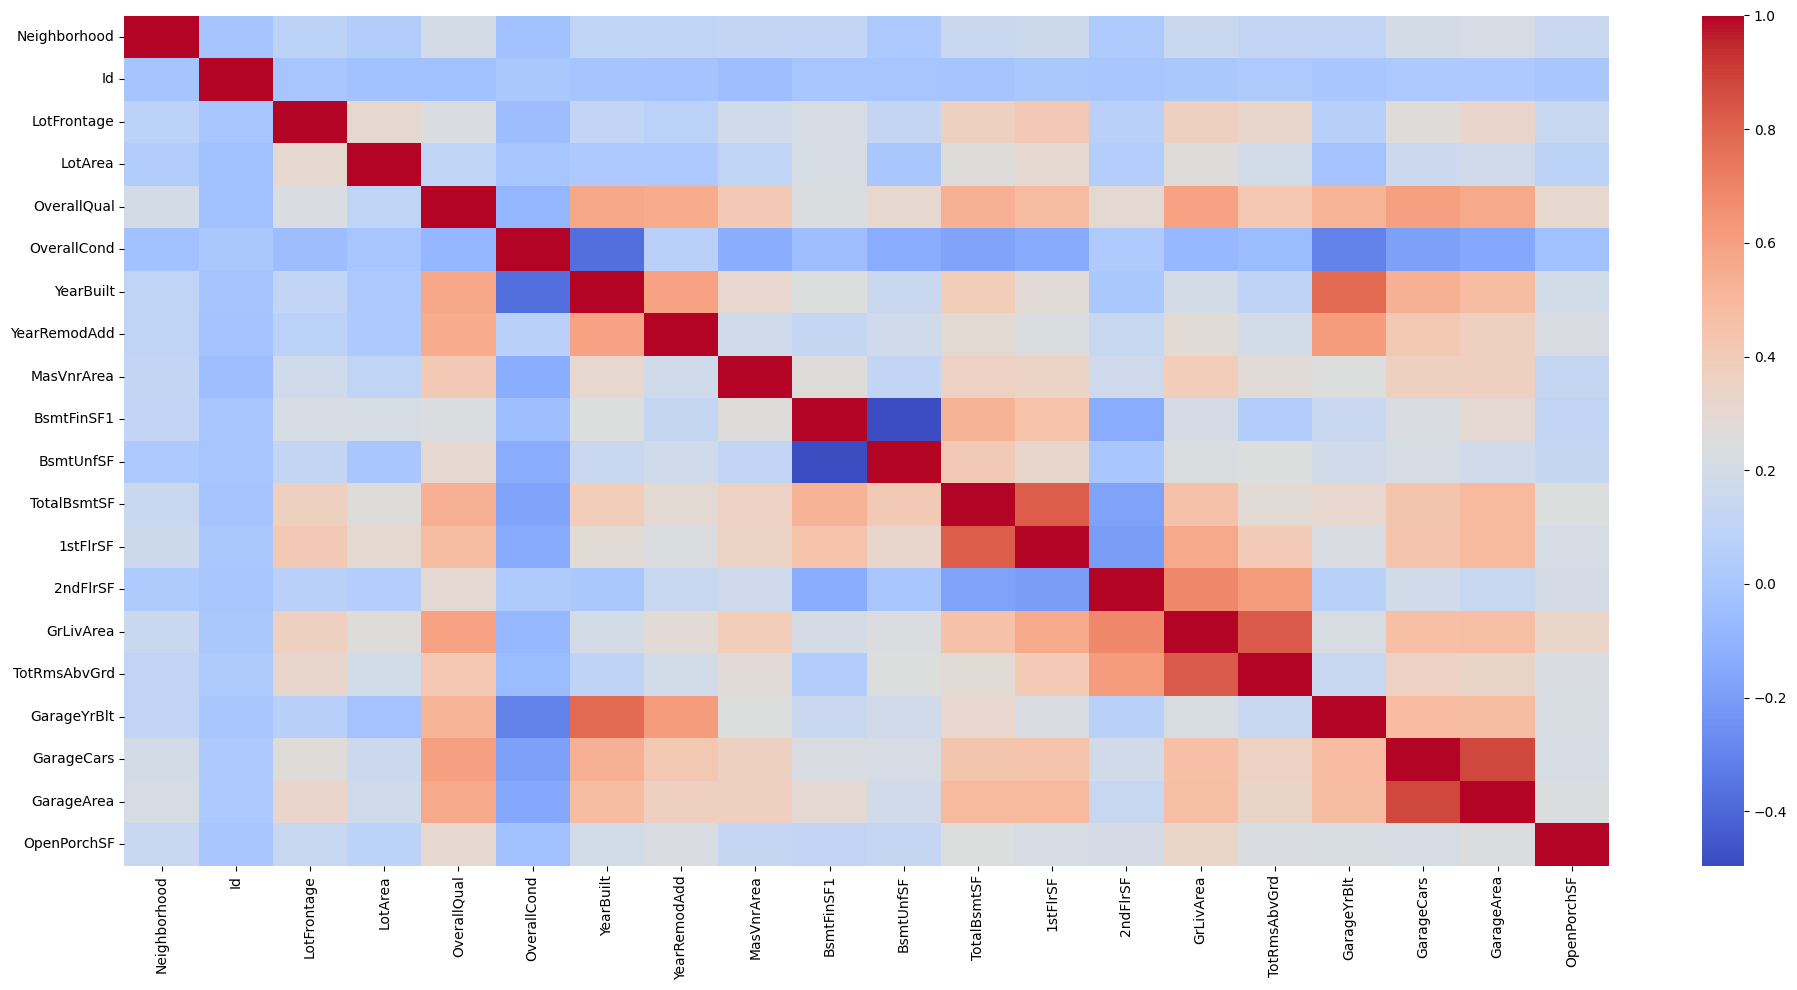

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),cmap='coolwarm')
plt.tight_layout()
plt.show()

Model Deployment

In [97]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(128,input_shape=(x_train.shape[1],),activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [99]:
history = model.fit(x_train,y_train,epochs=200,
                    batch_size = 64,
                    verbose = 1 , validation_split=0.20)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 37749923840.0000 - mae: 176947.2344 - val_loss: 27301527552.0000 - val_mae: 145823.8750
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21396987904.0000 - mae: 121807.9219 - val_loss: 7643740160.0000 - val_mae: 54383.3906
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8169707008.0000 - mae: 51935.0859 - val_loss: 5810372608.0000 - val_mae: 46908.0273
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5783134208.0000 - mae: 45985.5547 - val_loss: 4851748352.0000 - val_mae: 45536.3398
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5193511424.0000 - mae: 44859.7969 - val_loss: 4530418176.0000 - val_mae: 45860.7539
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4047542784.0000 - mae: 41736.9609 - val_loss: 4311923200.0000 - val_mae: 45494.5977
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3807701248.0000 - mae: 42849.1641 - val_loss: 4130019584.0000 - val_mae: 

In [100]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,677 (612.02 KB)

 Trainable params: 52,225 (204.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,452 (408.02 KB)

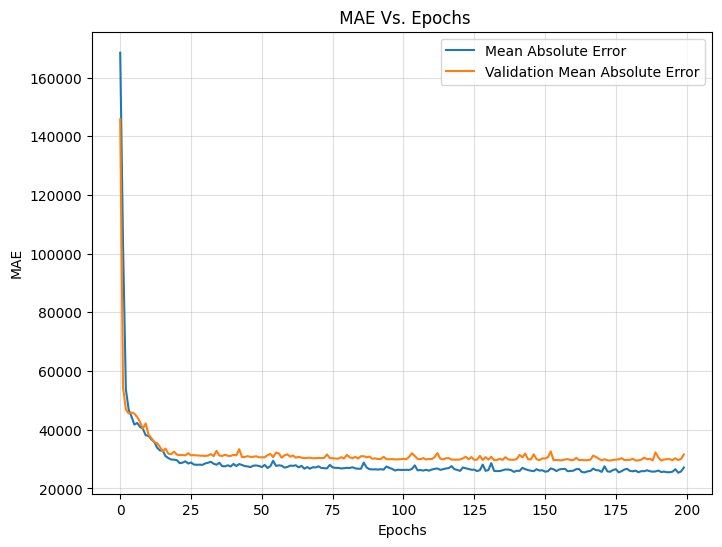

In [101]:
plt.figure(figsize=(8,6))
plt.plot(history.history['mae'], label="Mean Absolute Error")
plt.plot(history.history['val_mae'], label="Validation Mean Absolute Error")
plt.title(" MAE Vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid(alpha=0.40)
plt.show()

# Predictions by Model

In [102]:
x_test = test_df.loc[:,selected_features]
y_test = predicted['SalePrice']

In [103]:
loss , mae = model.evaluate(x_test,y_test)
print(f"\nLoss : {loss} , MAE : {mae}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3676492544.0000 - mae: 46344.0625

Loss : 3797937920.0 , MAE : 47864.02734375


# Evaluation of Model

In [104]:
pred = model.predict(x_test)
score = r2_score(pred,y_test)
rmse = root_mean_squared_error(pred,y_test)

print(f"\nScore : {score:.3f}\n")
print(f"RMSE : {rmse:.3f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Score : 0.082

RMSE : 61627.415


# Fluctuations b/w Actual and Predicted Sale Prices

In [105]:
Price_prediction = pd.DataFrame()
Price_prediction['ID'] = predicted['Id']
Price_prediction['Actual Price from testing set'] = predicted['SalePrice']
Price_prediction['Predicted price by Model'] = pred
Price_prediction['Error'] = Price_prediction['Actual Price from testing set'] - Price_prediction['Predicted price by Model']
Price_prediction.head()

,ID,Actual Price from testing set,Predicted price by Model,Error
0,1461,169277.0525,137436.046875,31841.005625
1,1462,187758.3940,153319.296875,34439.097125
2,1463,183583.6836,174842.062500,8741.621100
3,1464,179317.4775,165968.093750,13349.383750
4,1465,150730.0800,164413.812500,-13683.732500


# Visualization

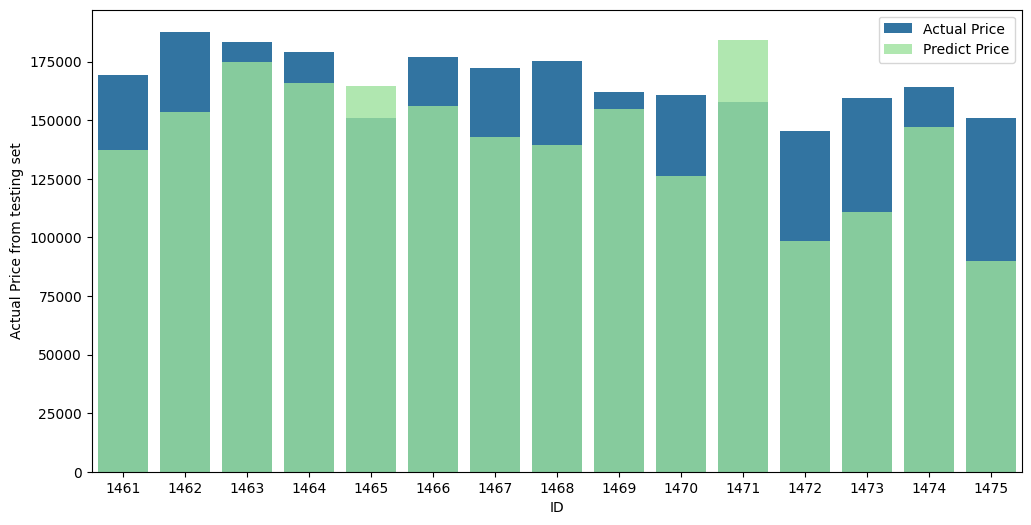

In [106]:
plt.figure(figsize=(12,6))
sns.barplot(data=Price_prediction[:15], x='ID', y='Actual Price from testing set', label = 'Actual Price')
sns.barplot(data=Price_prediction[:15], x='ID', y='Predicted price by Model', color='lightgreen',alpha=0.80, label = 'Predict Price')
plt.show()